# A dataset about cans of beer.

Data from http://craftcans.com/

## Do your importing and your setup

In [1]:
import pandas as pd
%matplotlib inline

## Read in the file `craftcans.csv`, and look at the first first rows

In [2]:
df = pd.read_csv("craftcans.csv", na_values=('???','Unknown','UNKNOWN','unknown','NA'))

## How many rows do you have in the data? What are the column types?

In [3]:
df.head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50%,50.0
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90%,26.0
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80%,19.0
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00%,38.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00%,25.0


In [4]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV          object
IBUs        float64
dtype: object

In [5]:
df.shape
#2415 rows, 7 columns

(2416, 7)

# Checking out breweries

Where does beer come from????

In [6]:
df['Location'].value_counts()

Grand Rapids, MI           66
Chicago, IL                55
Portland, OR               52
Indianapolis, IN           43
San Diego, CA              42
Boulder, CO                41
Denver, CO                 40
Brooklyn, NY               38
Seattle, WA                35
Longmont, CO               33
San Francisco, CA          32
Tampa, FL                  31
Stevens Point, WI          30
Austin, TX                 25
Fort Collins, CO           22
Boston, MA                 21
Cincinnati, OH             21
Aurora, IN                 20
Chandler, AZ               19
Saint Louis, MO            19
Eagle, CO                  19
Davenport, IA              18
Manhattan, KS              18
Boonville, CA              18
Missoula, MT               18
Salt Lake City, UT         17
Boise, ID                  17
Astoria, OR                16
Minneapolis, MN            16
San Antonio, TX            16
                           ..
Laurel, MD                  1
St Paul, MN                 1
Granger, I

## What are the top 10 producers of cans of beer?

In [7]:
df['Brewery'].value_counts().head(n=10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
21st Amendment Brewery        20
Great Crescent Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common size of beer?

The answer won't be pretty - we'll learn to clean it up in a week or two.

In [8]:
df['Size'].value_counts().head(n=10)

12 oz.               1507
16 oz.                814
24 oz.                 21
16 oz. Alumi-Tek®      15
19.2 oz.               14
12 oz                  14
16 oz                  12
32 oz.                  5
12 OZ.                  1
19.2                    1
Name: Size, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [9]:
df['ABV'].value_counts().head(n=10)

5.00%    215
5.50%    158
6.00%    125
6.50%    123
5.20%    107
7.00%     92
4.50%     89
4.80%     72
5.80%     66
5.60%     66
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take three steps:

1. List just the ABV of every row
2. Remove the % symbol
3. Convert it to a `float`
4. Save it into a new column. Or the same column, if you're feeling wild.

Although it *also* turns out that there's some bad data in there. We'll need to clean that up, too.

In [10]:
df['ABV'] = df['ABV'].str.replace('%', '')
df['ABV_again'] = df['ABV']
df['ABV_again'] = df['ABV_again'].astype(float)
df.head(5)

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_again
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50.0,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26.0,4.9
2,Wall's End,NorthGate Brewing,"Minneapolis, MN",English Brown Ale,16 oz.,4.80,19.0,4.8
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38.0,6.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25.0,6.0


# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [11]:
df['Location'].value_counts().head(10)

Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [12]:
df.groupby("Location")['Beer'].value_counts().groupby(level=0).head(3)

Location            Beer                                  
Abingdon, VA        Troopers Alley IPA                        1
Abita Springs, LA   Abita Amber                               1
                    Jockamo IPA                               1
                    Purple Haze                               1
Ada, MI             Sietsema Red Label                        1
Afton, VA           Blue Mountain Classic Lager               1
                    Full Nelson Pale Ale                      1
                    Full Nelson Pale Ale (2010)               1
Airway Heights, WA  Brünette                                  1
                    Clem's Gold                               1
                    Havanüther                                1
Albuquerque, NM     A Slice of Hefen                          1
                    Almanac IPA                               1
                    Elevated IPA                              1
Alpine, TX          Big Bend Hefeweizen      

In [13]:
df[df['Location'] == 'Brooklyn, NY']['Beer'].value_counts()

East India Pale Ale                2
Jammer                             1
KelSo India Pale Ale               1
Molotov Lite                       1
KelSo Nut Brown Lager              1
4Beans                             1
Harbinger                          1
Brooklyn Summer Ale (2011)         1
Sensi Harvest                      1
Nomader Weiss                      1
Resin                              1
KelSo Pilsner                      1
Rad                                1
Brooklyn Lager (16 oz.)            1
Brownstone                         1
Bengali                            1
Hi-Res                             1
Global Warmer                      1
Brooklyn Lager (12 oz.)            1
Hipster Ale (Westbrook Brewing)    1
Apollo                             1
The Crisp                          1
Autumnation (2013)                 1
Brooklyn Summer Ale                1
Hipster Ale (Two Roads Brewing)    1
Righteous Ale (2011)               1
The Crisp (2011)                   1
R

## What brewery in Brooklyn puts out the most cans of beer?

In [14]:
df[df['Location'] == 'Brooklyn, NY']['Brewery'].value_counts()

Sixpoint Craft Ales    24
Brooklyn Brewery        6
Evil Twin Brewing       5
KelSo Beer Company      3
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [15]:
df[df['Brewery'] == 'Sixpoint Craft Ales']['Style'].value_counts().head()

American IPA       4
Cream Ale          2
Rye Beer           2
Baltic Porter      2
German Pilsener    2
Name: Style, dtype: int64

## List all of the breweries in New York state. Then count them.

In [16]:
df_NY_brewery = df[df['Location'].str.contains('NY', na=False)]
df_NY_brewery

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_again
115,4Beans,Sixpoint Craft Ales,"Brooklyn, NY",Baltic Porter,12 oz.,10.00,52.0,10.0
210,Jammer,Sixpoint Craft Ales,"Brooklyn, NY",Gose,12 oz. Slimline,4.20,16.0,4.2
246,Abigale,Sixpoint Craft Ales,"Brooklyn, NY",Belgian Pale Ale,12 oz.,8.00,NaN,8.0
404,Nomader Weiss,Evil Twin Brewing,"Brooklyn, NY",Berliner Weissbier,12 oz.,4.00,NaN,4.0
421,Rad,Sixpoint Craft Ales,"Brooklyn, NY",Fruit / Vegetable Beer,16 oz.,3.20,7.0,3.2
439,Molotov Lite,Evil Twin Brewing,"Brooklyn, NY",American Double / Imperial IPA,16 oz.,8.50,NaN,8.5
588,Bengali,Sixpoint Craft Ales,"Brooklyn, NY",American IPA,"24 oz. ""Silo Can""",6.50,62.0,6.5
598,8 Barrel,Chatham Brewing,"Chatham, NY",American Strong Ale,16 oz.,8.00,69.0,8.0
599,Oktoberfest,Chatham Brewing,"Chatham, NY",Märzen / Oktoberfest,16 oz.,5.50,40.0,5.5
628,Cream Ale,Newburgh Brewing Company,"Newburgh, NY",Cream Ale,12 oz.,4.20,35.0,4.2


In [17]:
df_NY_brewery.shape
#We have 74 brewweries in NY State

(74, 8)

# Measuring International Bitterness Units

IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## What is the average IBU measurement across all beers?

In [18]:
df['IBUs'].mean()

42.713167259786474

## Draw the distribution of IBU measurements, but with *thirty* bins instead of the default of 10

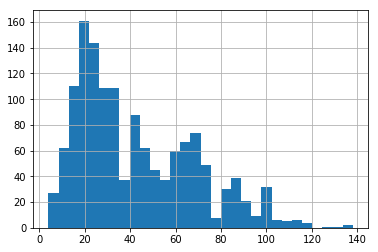

In [19]:
df['IBUs'].hist(bins=30)

## List all of the beers with IBUs above the 75th percentile

In [20]:
df['IBUs'].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: IBUs, dtype: float64

In [21]:
df[df['IBUs'] > 64.00].head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_again
6,Citra Ass Down,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,8.00,68.0,8.0
7,London Balling,Against the Grain Brewery,"Louisville, KY",English Barleywine,16 oz.,12.50,80.0,12.5
14,Rico Sauvin,Against the Grain Brewery,"Louisville, KY",American Double / Imperial IPA,16 oz.,7.60,68.0,7.6
17,Pile of Face,Against the Grain Brewery,"Louisville, KY",American IPA,16 oz.,6.00,65.0,6.0
21,Excess IPL,Jack's Abby Craft Lagers,"Framingham, MA",American India Pale Lager,16 oz.,7.20,80.0,7.2


## List all of the beers with IBUs below the 25th percentile

In [22]:
df[df['IBUs'] > 21.00].head()

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_again
0,Get Together,NorthGate Brewing,"Minneapolis, MN",American IPA,16 oz.,4.50,50.0,4.5
1,Maggie's Leap,NorthGate Brewing,"Minneapolis, MN",Milk / Sweet Stout,16 oz.,4.90,26.0,4.9
3,Pumpion,NorthGate Brewing,"Minneapolis, MN",Pumpkin Ale,16 oz.,6.00,38.0,6.0
4,Stronghold,NorthGate Brewing,"Minneapolis, MN",American Porter,16 oz.,6.00,25.0,6.0
5,Parapet ESB,NorthGate Brewing,"Minneapolis, MN",Extra Special / Strong Bitter (ESB),16 oz.,5.60,47.0,5.6


## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the nan ones at the bottom. I want a nice graph, too - don't let them all be squished together, either!

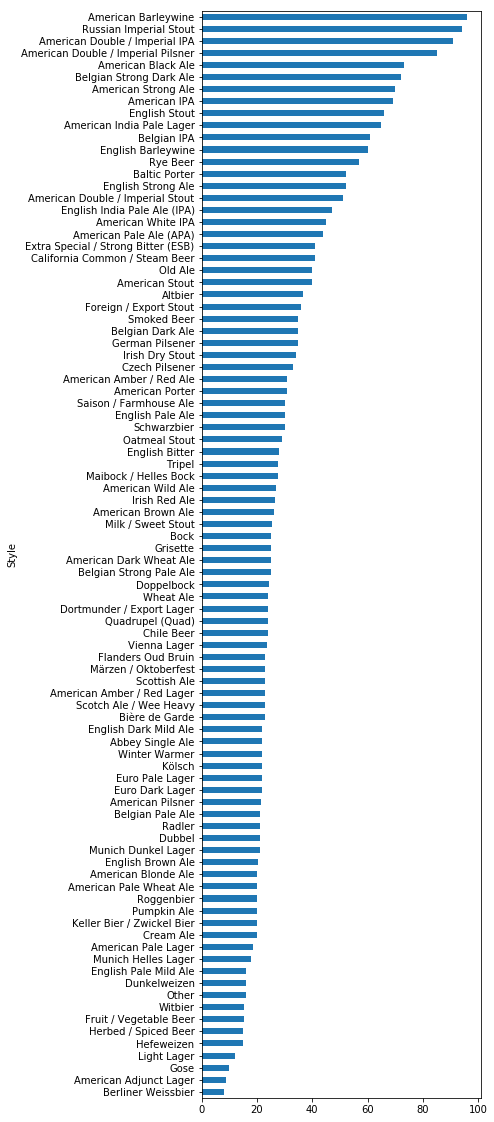

In [23]:
df.groupby('Style')['IBUs'].median().dropna().sort_values().head(99).plot(kind='barh', figsize=(5,20))

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

You'll want to think about it in three pieces - finding the high IBU beers, then finding out what the most common styles are, then getting the top 5.

In [24]:
#df['IBUs'].value_counts().head(5)

In [25]:
#df.groupby('IBUs')['Style'].value_counts().groupby(level=0).head(5)

In [26]:
IBUs_high = df[df['IBUs'] > 64.00]['IBUs'].sort_values().tail()

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles (also draw a histogram)

I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

In [27]:
df[df['Style'].isin(['Witbier', 'American Pale Wheat Ale', 'Hefeweizen'])]

,Beer,Brewery,Location,Style,Size,ABV,IBUs,ABV_again
30,Park,Fort Point Beer Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.70,19.0,4.7
42,Whitewater,Great Divide Brewing Company,"Denver, CO",American Pale Wheat Ale,12 oz.,6.10,NaN,6.1
72,Citra Faced,Three Pints Brewing,"Martinsville, IN",American Pale Wheat Ale,16 oz.,5.50,64.0,5.5
112,Summer Wheat,Anchor Brewing Company,"San Francisco, CA",American Pale Wheat Ale,12 oz.,4.50,NaN,4.5
138,Waterkeeper,SweetWater Brewing Company,"Atlanta, GA",Hefeweizen,12 oz.,5.70,NaN,5.7
139,Weissenheimer,Destihl Brewery,"Bloomington, IL",Hefeweizen,12 oz.,5.20,16.0,5.2
142,Beach Cruiser,Latitude 42 Brewing Company,"Portage, MI",Hefeweizen,12 oz.,4.50,NaN,4.5
164,Pinata Protest,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,6.00,NaN,6.0
167,Rye Wit,Freetail Brewing Company,"San Antonio, TX",Witbier,12 oz.,4.20,10.0,4.2
190,Beach Patrol,Brewery Vivant,"Grand Rapids, MI",Witbier,16 oz.,6.50,NaN,6.5


In [28]:
Hist1 = df[df['Style'].isin(['Witbier', 'American Pale Wheat Ale', 'Hefeweizen'])]['IBUs'].mean()

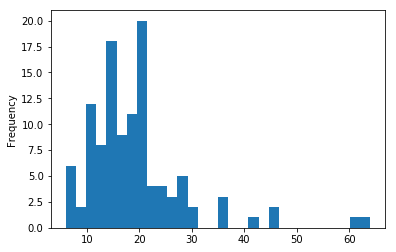

In [29]:
df[df['Style'].isin(['Witbier', 'American Pale Wheat Ale', 'Hefeweizen'])]['IBUs'].plot(kind='hist', bins=30)

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [30]:
df[df['Style'].str.contains("IPA", na=False)]['IBUs'].mean()

71.948979591836732

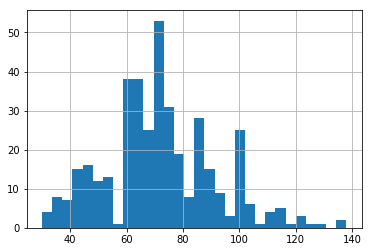

In [31]:
Hist2 = df[df['Style'].str.contains("IPA", na=False)]['IBUs']
Hist2.hist(bins=30)

## Plot those two histograms on top of one another

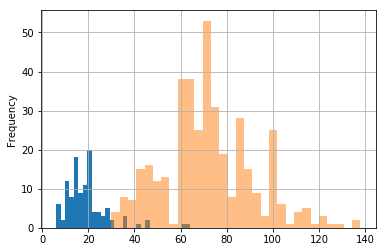

In [32]:
ax = df[df['Style'].isin(['Witbier', 'American Pale Wheat Ale', 'Hefeweizen'])]['IBUs'].plot(kind='hist', bins=30)
Hist2.hist(bins=30, ax=ax, alpha=0.5)

## Compare the ABV of wheat beers vs. IPAs 

In [33]:
df[df['Style'].str.contains("IPA", na=False)].groupby('Style')['ABV_again'].mean()

Style
American Double / Imperial IPA    8.736893
American IPA                      6.452758
American White IPA                5.963636
Belgian IPA                       7.135294
English India Pale Ale (IPA)      6.233333
Name: ABV_again, dtype: float64

In [34]:
df[df['Style'].str.contains("Wheat", na=False)].groupby('Style')['ABV_again'].mean()

Style
American Dark Wheat Ale    5.233333
American Pale Wheat Ale    4.841053
Wheat Ale                  6.000000
Name: ABV_again, dtype: float64